KNN Accuracy: 0.6892

Classification Report:
              precision    recall  f1-score   support

           0       0.68      1.00      0.81      1275
           1       1.00      0.06      0.12       633

    accuracy                           0.69      1908
   macro avg       0.84      0.53      0.47      1908
weighted avg       0.79      0.69      0.58      1908


Confusion Matrix:
[[1275    0]
 [ 593   40]]


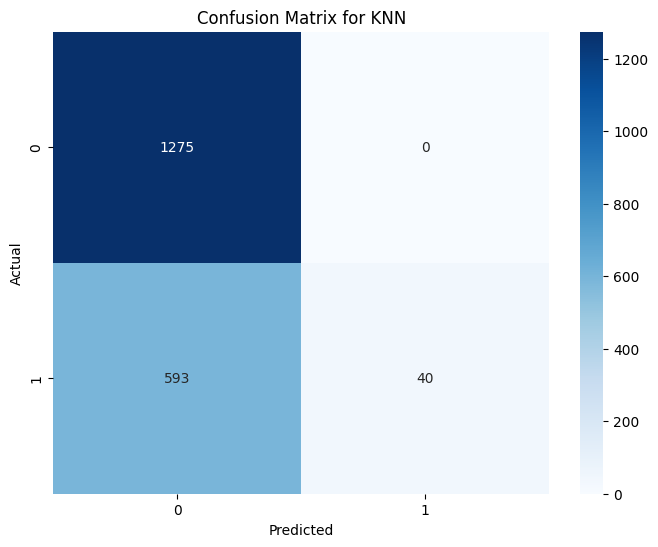

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# ----------------- Load Dataset -----------------
df = pd.read_csv("/kaggle/input/diabetes-dataset/diabetes_dataset.csv")  # Replace with actual dataset path

# Assume last column is the target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Encode categorical target variable if necessary
if y.dtype == 'O':
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----------------- Manual Tuning -----------------
# Manually select hyperparameters
params = {
    'n_neighbors': 300,          # Number of neighbors
    'weights': 'uniform',      # Use uniform weights (all neighbors have equal influence)
    'metric': 'minkowski',     # Use Minkowski distance metric
    'p': 1.5                     # p=2 for Euclidean distance
}

# ----------------- Train KNN -----------------
knn = KNeighborsClassifier(**params)
knn.fit(X_train, y_train)

# ----------------- Predictions -----------------
y_pred = knn.predict(X_test)

# ----------------- Evaluation -----------------
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# ----------------- Plot Confusion Matrix -----------------
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for KNN")
plt.show()
